# Biological Signals Analysis - Week 3 Homework

## Created by Guy Singer, January 18, 2024

## Table of Contents
- [Math Exercises - Convolutions and Filters](#math-exercises)
    - [Question 1: Convolving Two Arrays](#question-1)
    - [Question 2: Convolving Two Signals with an FFT](#question-2)
    - [Question 3: Moving Average Filter](#question-3)
    - [Question 4: Butterwoth Filter](#question-4)
- [Programming Exercises](#programming-exercises)
    - [Question 5: Loading the Data](#question-5)
    - [Question 6: Noise Filtering](#question-6)
    - [Question 7: Creating ERP Template](#question-7)
    - [Question 8: Matched Filter Convolution](#question-8)

<a id="math-exercises"></a>
## Math Exercises - Convolutions and Filters

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (Convolutions and Filters).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Question 1: Convolving Two Arrays

Given two arrays, $A = [3, 4, 5, 6, 2]$ and $B = [1, 2, 3]$, perform the regular convolution of these arrays. Provide a detailed step-by-step calculation and explain how the convolution changes the characteristics of the original arrays. What is the significance of convolution in signal processing, especially in the context of neural data analysis?


$ (A * B)[n] = \sum_{k} A[k] \cdot B[n-k] $

The detailed step-by-step calculation is as follows:

\[
\begin{align*}
(A * B)[0] & = 3 \cdot 1 = 3 \\
(A * B)[1] & = 4 \cdot 1 + 3 \cdot 2 = 10 \\
(A * B)[2] & = 5 \cdot 1 + 4 \cdot 2 + 3 \cdot 3 = 22 \\
(A * B)[3] & = 6 \cdot 1 + 5 \cdot 2 + 4 \cdot 3 = 28 \\
(A * B)[4] & = 2 \cdot 1 + 6 \cdot 2 + 5 \cdot 3 = 29 \\
(A * B)[5] & = 2 \cdot 2 + 6 \cdot 3 =22\\
(A * B)[6] & = 2 \cdot 3 =6\\
\end{align*}
\]

So, the convolution $A * B$ results in the array $[3, 10, 22, 28, 29, 22, 6]$.


<a id="question-2"></a>
### Question 2: Convolving Two Signals with an FFT

Consider two discrete-time signals, $X[n]$ and $Y[n]$, each with a length of 1000 points. Write an expression for convolving these signals using the Fast Fourier Transform (FFT) method. Compare the computational complexity of this method with the direct convolution method. Why is FFT-based convolution particularly beneficial in the context of processing large neural datasets?

The expression 

Compute the FFT of $X[n]$:

$X[\omega]= \text{FFT}(X[n])$

Compute the FFT of $Y[n]$:

$Y[\omega]= \text{FFT}(Y[n])$

Multiply the frequency domain representations element-wise:

$Z[\omega] = X[\omega]  \cdot Y[\omega]$

Compute the inverse FFT of $Z[\omega]$:

$Z[n] = \text{IFFT}(Z[\omega])$


The computational complexity of FFT-based convolution is significantly lower compared to the direct convolution method. The direct convolution method has a time complexity of $O(N^2)$, where $(N)$ is 2000 (1000+1000). On the other hand, FFT-based convolution has a time complexity of $(O(N \log N))$. This makes FFT-based convolution more efficient for those large inputs.

Neural datasets often involve signals with a large number of data points, making the direct convolution method computationally expensive- time complexity of $O(N^2)$. The FFT-based convolution method reduces time complexity and enables faster convolution operations, making it more suitable for real-time processing and analysis of large neural datasets.


<a id="question-3"></a>
### Question 3: Moving Average Filter

You have a signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$. Calculate the moving average of this signal using a Finite Impulse Response (FIR) filter with a window size of 3. Show your calculations in detail. Discuss the effect of the moving average filter on the signal, particularly in terms of smoothing and latency. How does this apply to neural signal processing?



$\text{Moving Average}[n] = \frac{1}{3} \sum_{k=0}^{2} S[n-k] $

\begin{align*}
    \text{For } n = 0: & \quad MA[0] = \frac{1}{3} \cdot (2) = \frac{2}{3} \\
    \text{For } n = 1: & \quad MA[1] = \frac{1}{3} \cdot (3 + 2) = \frac{5}{3} \\
    \text{For } n = 2: & \quad MA[2] = \frac{1}{3} \cdot (4 + 3 + 2) = 3 \\
    \text{For } n = 3: & \quad MA[3] = \frac{1}{3} \cdot (5 + 4 + 3) = 4 \\
    \text{For } n = 4: & \quad MA[4] = \frac{1}{3} \cdot (6 + 5 + 4) = 5 \\
    \text{For } n = 5: & \quad MA[5] = \frac{1}{3} \cdot (7 + 6 + 5) = 6 \\
    \text{For } n = 6: & \quad MA[6] = \frac{1}{3} \cdot (8 + 7 + 6) = 7 \\
    \text{For } n = 7: & \quad MA[7] = \frac{1}{3} \cdot (9 + 8 + 7) = 8 \\
    \text{For } n = 8: & \quad MA[8] = \frac{1}{3} \cdot (10 + 9 + 8) = 9 \\
\end{align*}

So, the moving average of the signal \(S\) using a window size of 3 is given by $[\frac{2}{3}, \frac{5}{3}, 3, 4, 5, 6, 7, 8, 9]$.


The moving average smoothens out fluctuations in the signal, acting as a low-pass filter to reduce high-frequency components.
The moving average introduces a delay, or latency, equal to half of the window size (1.5 in this example).
In neural signal processing, moving averages are useful for smoothing out noise or high-frequency fluctuations in neural signals.
They assist in identifying trends or patterns in neural data by filtering out short-term variations.


<a id="question-4"></a>
### Question 4: Butterworth Filter

Design a Butterworth low-pass filter with a cutoff frequency of 100 Hz for a signal sampled at 1000 Hz. Provide the order of the filter and its frequency response equation. Explain how the characteristics of a Butterworth filter make it suitable or unsuitable for certain types of neural signals. What considerations should be made when choosing the order of the filter?


The Butterworth low-pass filter is mathematically represented by its transfer function:
$ H(s) = \frac{G}{\sqrt{1 + \left(\frac{s}{\omega_c}\right)^{2n}}} $



The order of the Butterworth filter is determined by the formula:
$n = \frac{\log\left(\frac{1}{\sqrt{1 - \epsilon^2}}\right)}{\log\left(\frac{\omega_c}{\omega_s}\right)} $

$ n = \frac{\log\left(\frac{1}{\sqrt{1 - 0.707^2}}\right)}{\log\left(\frac{2 \pi \times 100 \text{ Hz}}{1000 \text{ Hz}}\right)} $

$n \approx \frac{\log\left(\frac{1}{\sqrt{1 - 0.5}}\right)}{\log(0.2 \pi)} \approx 1.64 $

Since the order of the filter must be an integer, we round up to the nearest integer. Therefore, the order \( n \) is 2.

$H(f) = \frac{G}{\sqrt{1 + \left(\frac{f}{\omega_c}\right)^{2n}}} $


Smooth Frequency Roll-off:
- Butterworth filters provide a maximally flat frequency response in the passband.
- The roll-off in the stopband is gradual, making it suitable for applications where abrupt transitions in the frequency domain are not desired.

No Ripples in the Passband:
- Butterworth filters have no ripples in the passband, contributing to a more predictable response.

Phase Linearity:
- Butterworth filters exhibit linear phase response, preserving the phase relationships of different frequency components.


Suitability for Neural Signals:
- Butterworth filters are suitable for neural signals when a smooth frequency roll-off and linear phase response are important.
- The absence of ripples in the passband is beneficial for preserving the integrity of neural signal characteristics.
Considerations:
- The gradual roll-off may result in some attenuation of higher frequencies close to the cutoff frequency. This should be considered in applications where high-frequency components are relevant.

Choosing the order has a trade-off effect between Roll-off and Filtering Accuracy:
- Higher-order filters provide steeper roll-off but may introduce more phase distortion. Therefore, the choice of order depends on the specific requirements of the application
- Higher-order filters generally require more computational resources. The order should be chosen considering the available resources and real-time processing constraints.
- Higher-order filters may improve the SNR by providing better attenuation of unwanted frequencies. However, the SNR improvement may reach a point of diminishing returns.




<a id="programming-exercises"></a>
## Programming Exercises

In the following cells, you will write python code to manipulate and analyze an EEG signal, in order to gain insights about what is contained in the signal.

You are provided with 10 EEG recordings containing an ERP. These 10 recordings are in the file named "eeg_signals.pkl". You are also provided with a file called "erp_timestamps.txt", which contain the timestamps for the ERPs in the 10 signals.

You are also provided with an 11th EEG recording, in which you will try to locate the ERP. No timestamp is provided for this recording. This recording is saved in the file called "eeg_signal_to_analyze.pkl".

<a id="question-5"></a>
### Question 5: Loading the Data

Write a script to load the 10 EEG recordings located in the "eeg_signals.pkl" file. Once loaded, create visualizations for all of the recordings in both the time and frequency domains. Discuss any notable features you observe in these domains. How do these visualizations help in understanding the EEG recordings?

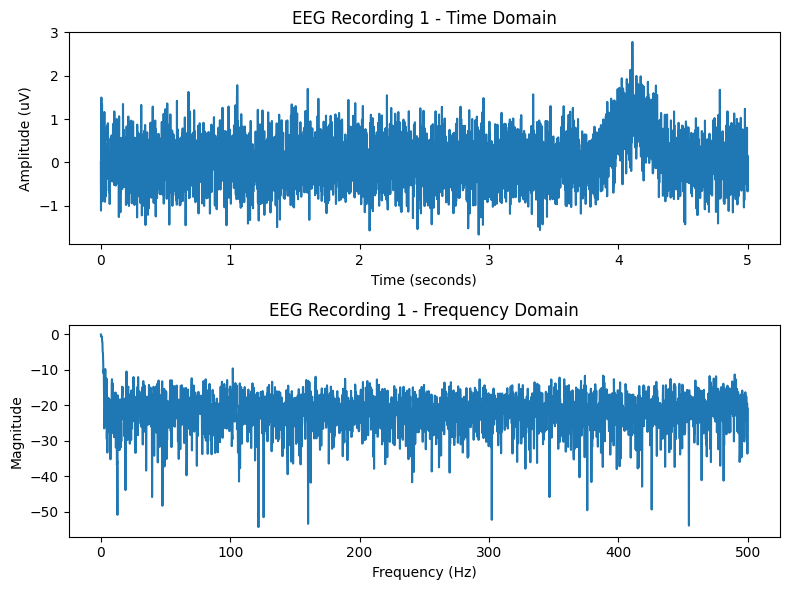

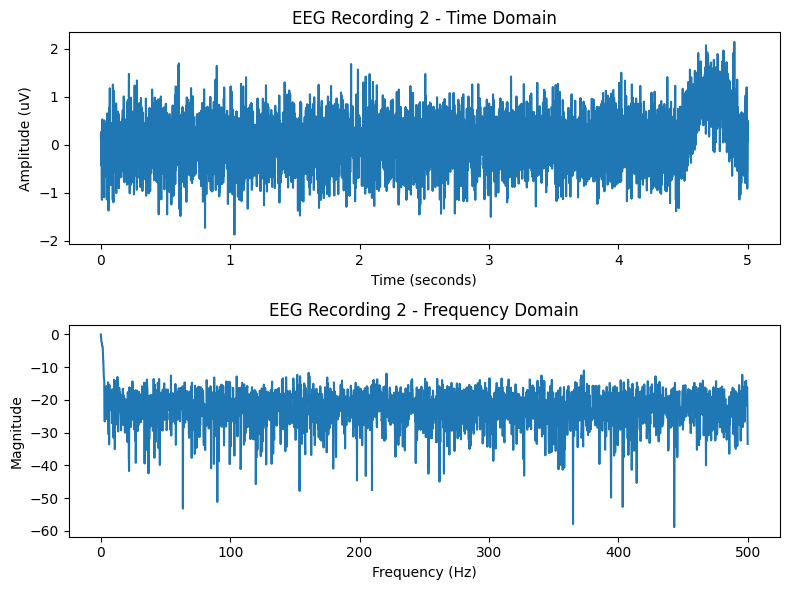

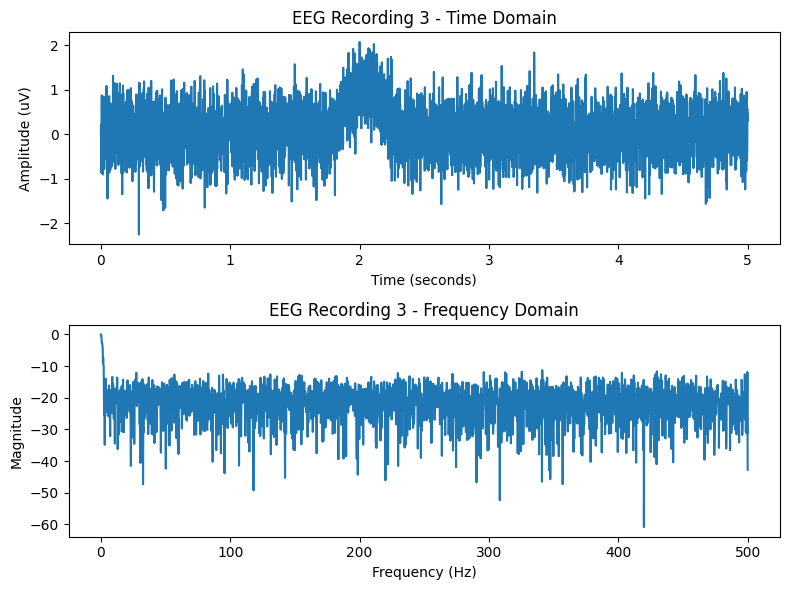

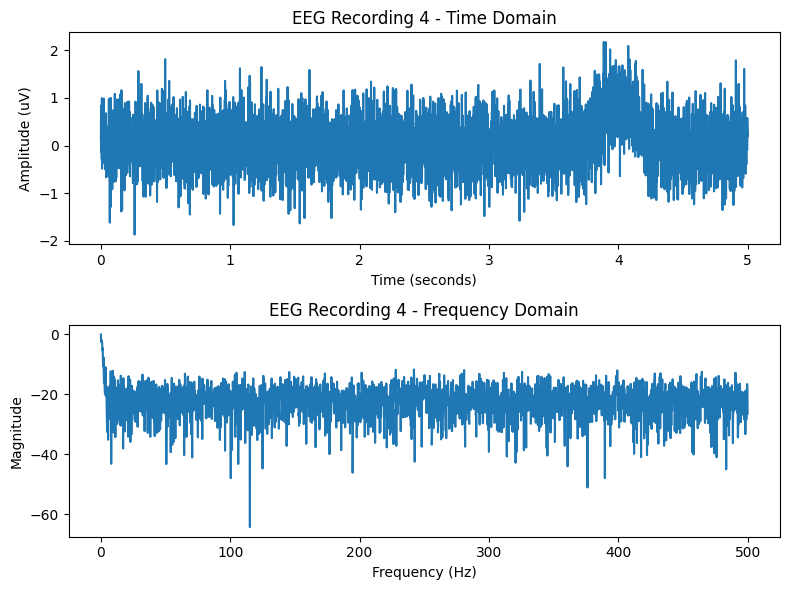

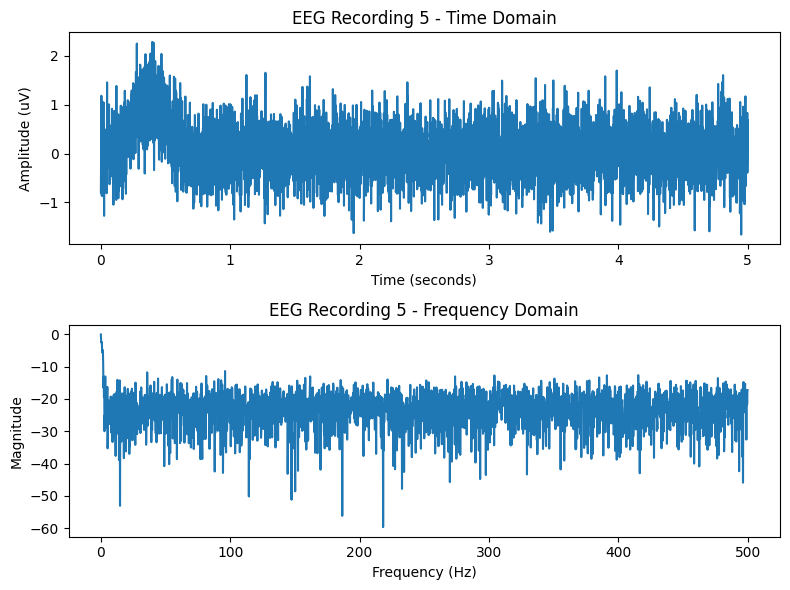

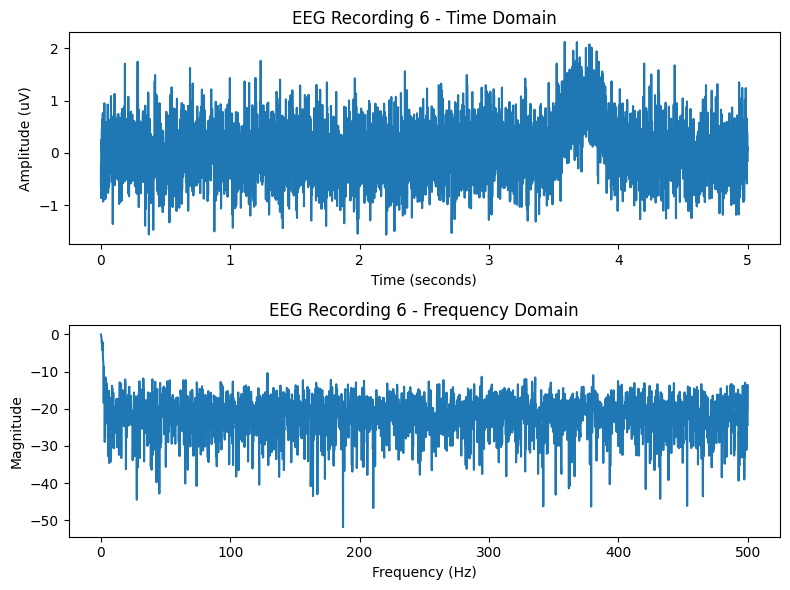

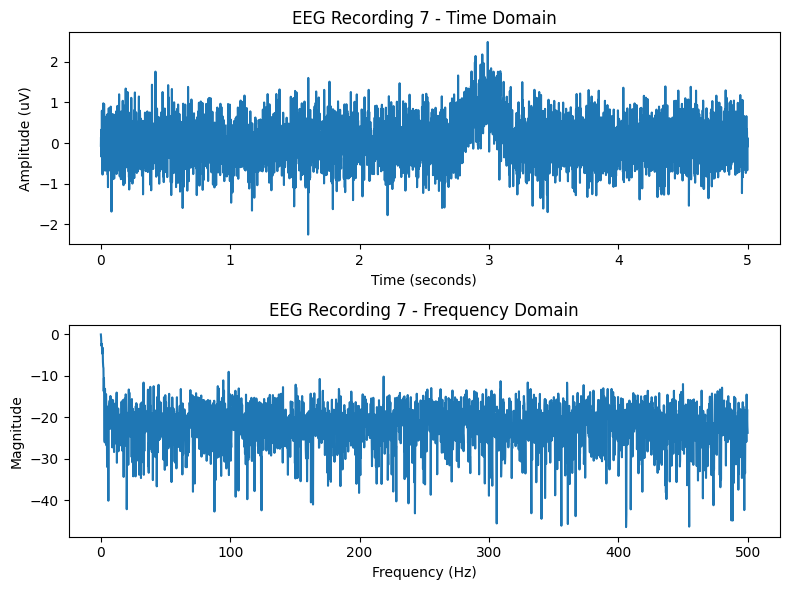

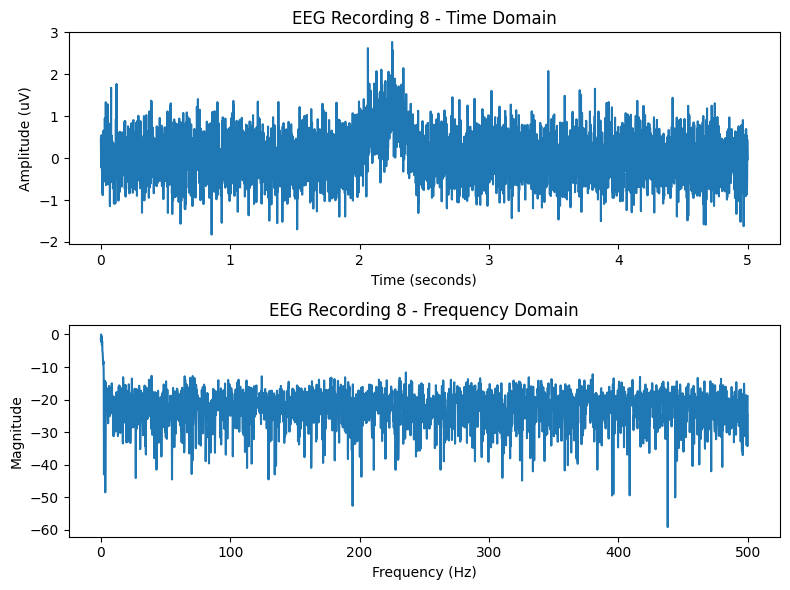

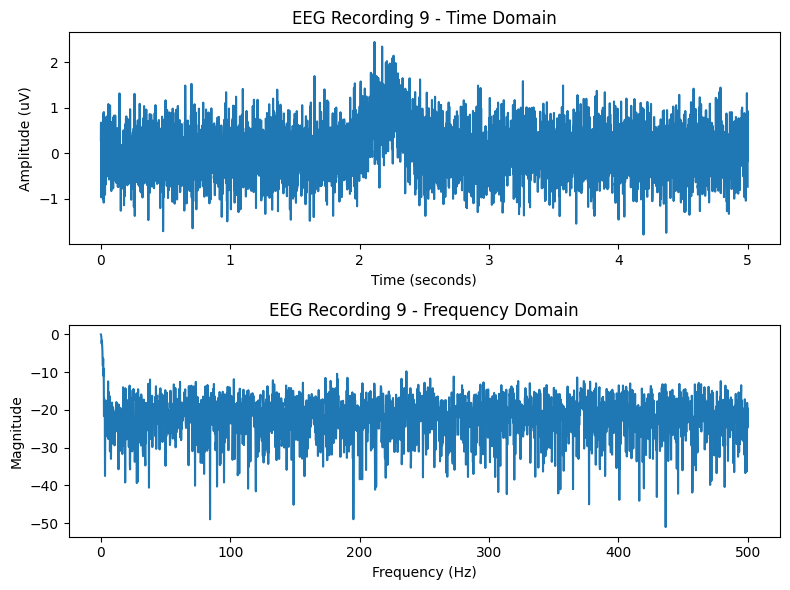

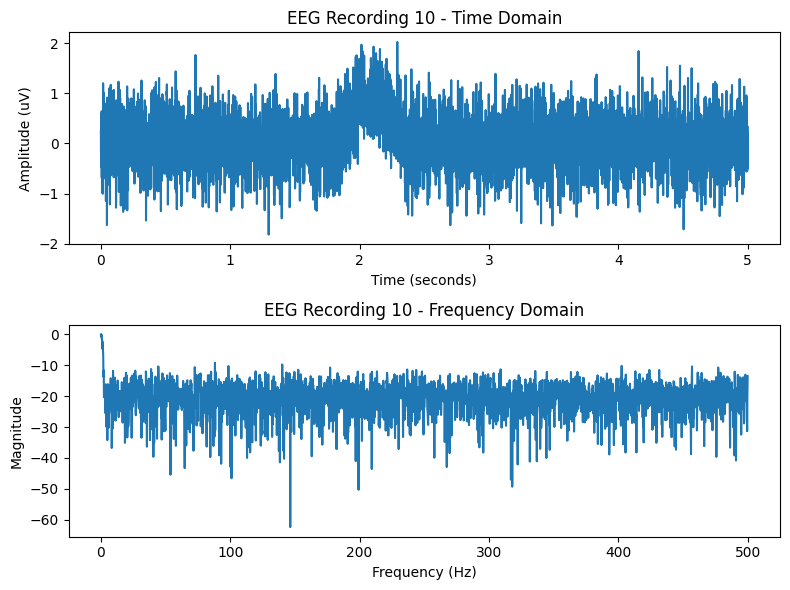

In [92]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Provided parameters
sampling_rate = 1000
duration = 5
dt = 0.001
N = 5000
T = N * dt  # Same as duration
f_s = 1 / dt  # Sampling rate

# Load EEG recordings from the "eeg_signals.pkl" file
with open("eeg_signals.pkl", "rb") as file:
    eeg_recordings = pickle.load(file)

# Time axis for plotting
time_axis = np.linspace(0, T, N)

# Visualize EEG recordings with both time and frequency domains together
for i, recording in enumerate(eeg_recordings):
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot the time domain
    ax1.plot(time_axis, recording)
    ax1.set_title(f"EEG Recording {i+1} - Time Domain")
    ax1.set_xlabel("Time (seconds)")
    ax1.set_ylabel("Amplitude (uV)")

    # Plot the frequency domain
    EEG_transformed = rfft(recording)
    frequencies = rfftfreq(N, d=dt)  # Use the provided dt for accurate frequency axis
    spectrum = (2 * dt ** 2 / T * EEG_transformed * EEG_transformed.conj()).real
    ax2.plot(frequencies,10 * np.log10(spectrum / max(spectrum)))
    ax2.set_title(f"EEG Recording {i+1} - Frequency Domain")
    ax2.set_xlabel("Frequency (Hz)")
    ax2.set_ylabel("Magnitude")
  
    plt.tight_layout()
    plt.show()


 we can detect which filter to use low-pass or high-pass filter can help emphasize different components. also from looking at the frequency domain plot we can decide what is the cutoff frequency for the filters.

<a id="question-6"></a>
### Question 6: Noise Filtering

Implement a noise filtering technique on the EEG recordings using a filter of your choice (e.g., low-pass, high-pass, band-pass, notch filter). Explain the rationale behind your choice of filter and its parameters (such as cutoff frequency). How does this filter improve the quality of the EEG data? Provide before and after visualizations of the filtered signal and discuss the impact of your filtering.

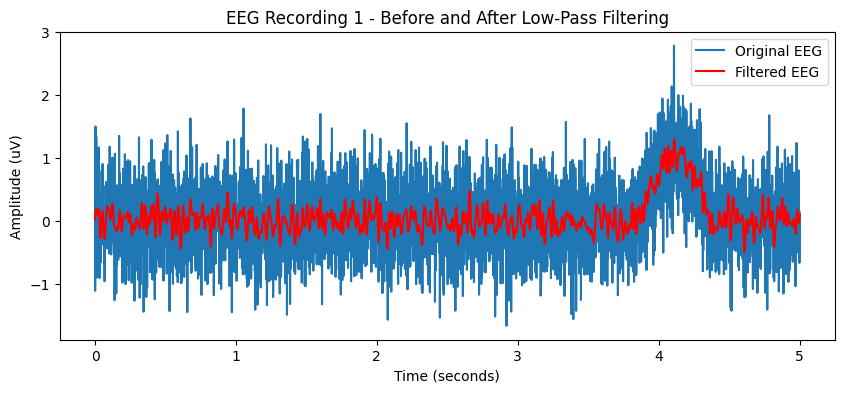

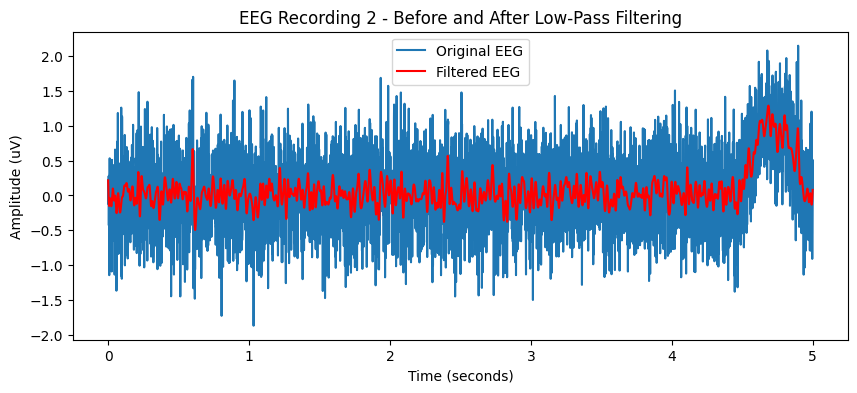

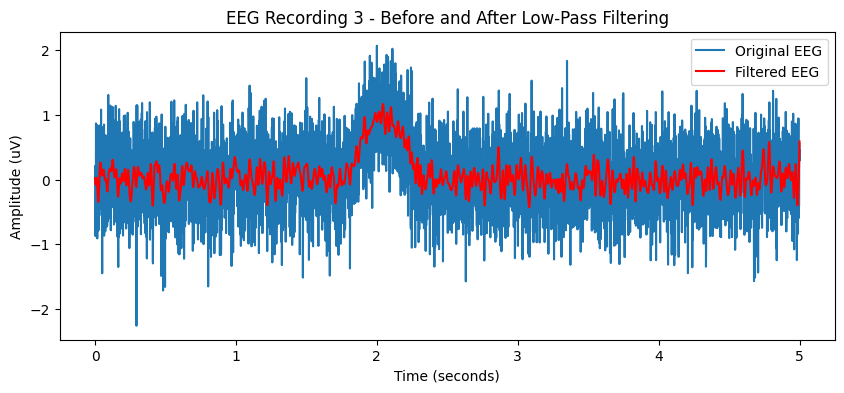

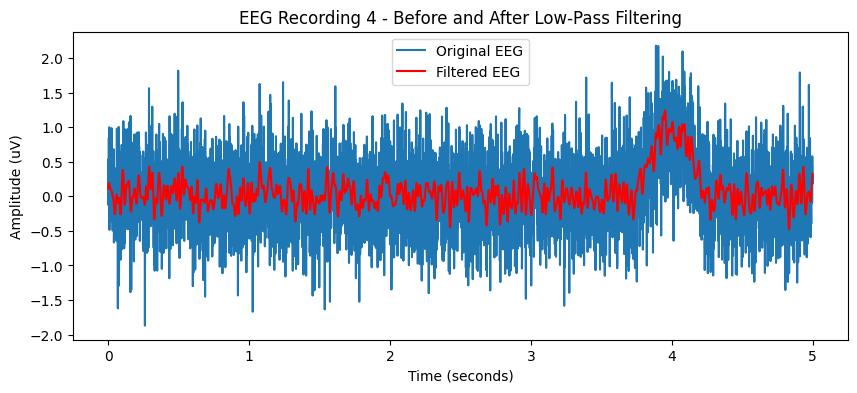

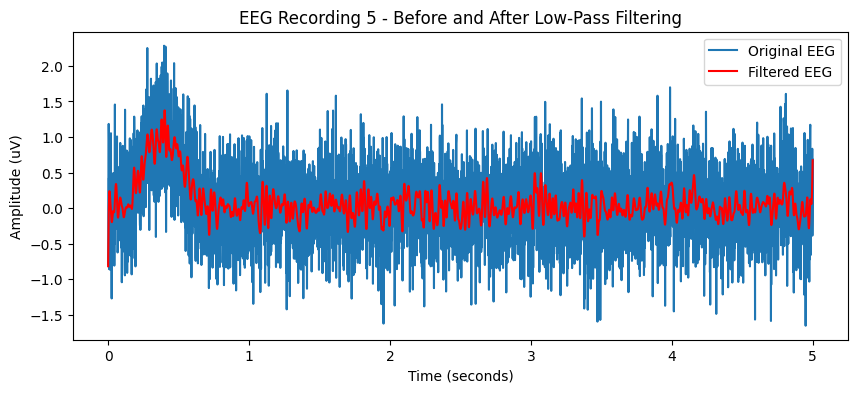

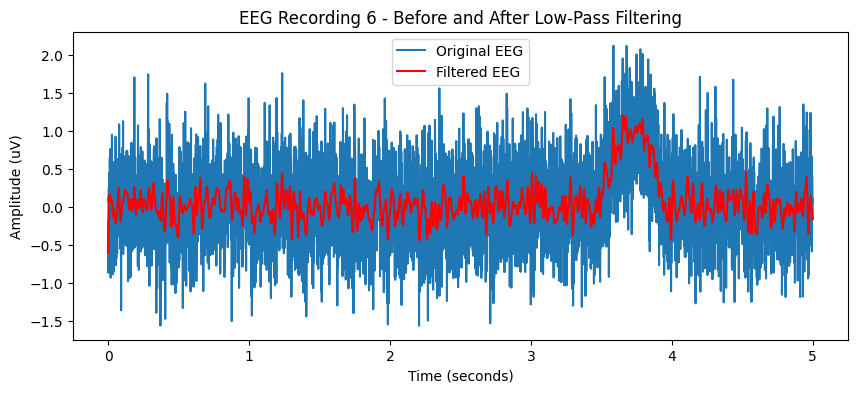

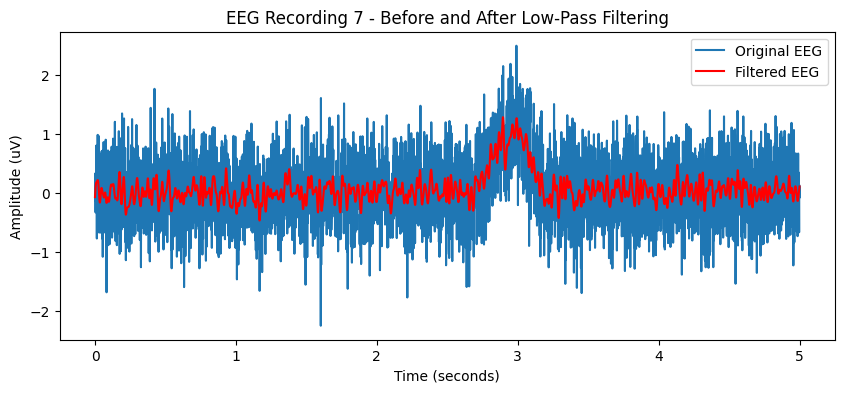

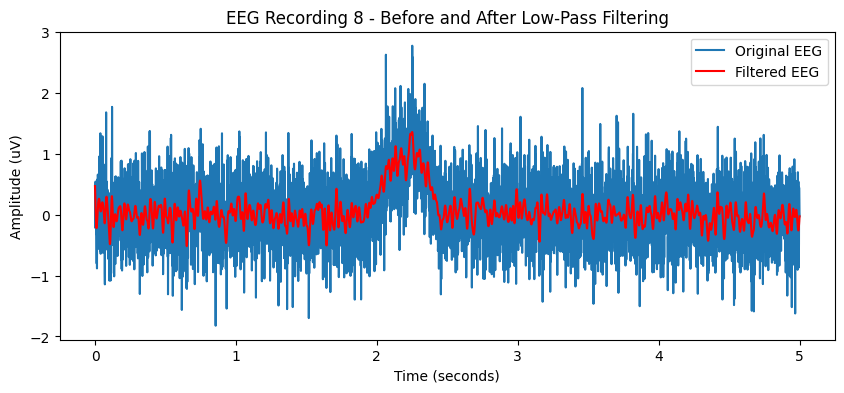

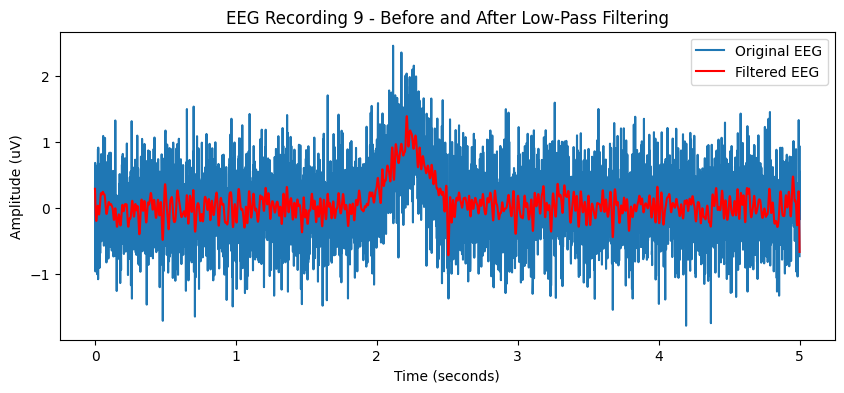

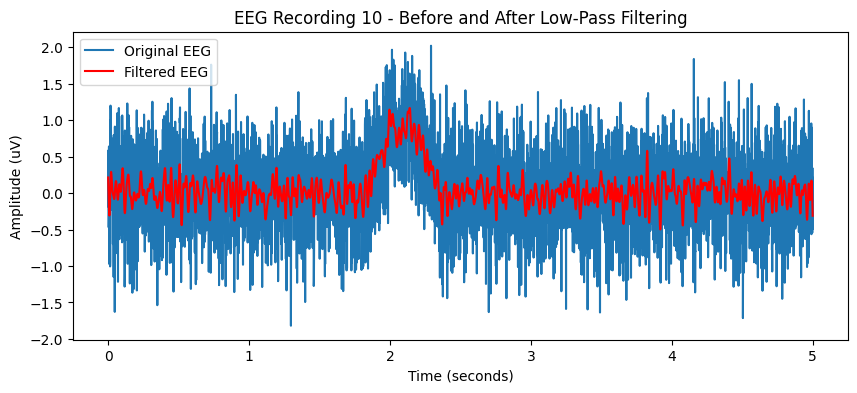

In [10]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Visualize EEG recordings with both time and frequency domains before and after filtering
for i, recording in enumerate(eeg_recordings):
    # Create a figure with two subplots for "before filtering"


    # Apply low-pass Butterworth filter
    cutoff_frequency = 50  # Choose a cutoff frequency based on observation
    filtered_recording = butter_lowpass_filter(recording, cutoff_frequency, sampling_rate)

    # Create a figure with two subplots for "after filtering"
    plt.figure(figsize= (10,4))

    # Plot the filtered time domain signal
    plt.plot(time_axis, recording, label = 'Original EEG')
    plt.plot(time_axis, filtered_recording, label = "Filtered EEG", color= 'red')
    
   
    plt.title(f"EEG Recording {i+1} - Before and After Low-Pass Filtering")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude (uV)")
    plt.legend()
    plt.show()


Low-pass filtering is a common technique used in EEG signal processing to remove high-frequency noise and retain the slower, relevant components of the signal, such as the Event-Related Potentials (ERPs)

<a id="question-7"></a>
### Question 7: Creating ERP Template

Write a script to average the 10 EEG recordings, aligning them based on the known timestamps of the Event-Related Potentials (ERP). This will create an idealized template of the ERP. Plot the resulting averaged ERP and discuss its characteristics. How does averaging help in identifying the features of the ERP? Discuss any potential issues that might arise from this method.


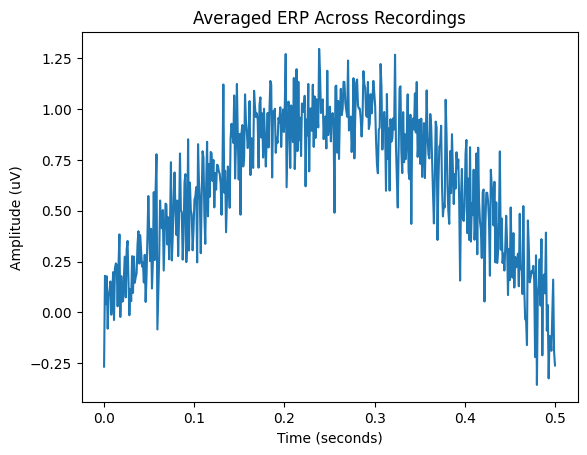

In [111]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.signal import windows


# Load EEG recordings and timestamps
with open("eeg_signals.pkl", "rb") as eeg_file, open("erp_timestamps.txt", "r") as timestamp_file:
    erp_timestamps = [float(line.strip()) for line in timestamp_file]

erp_duration = 0.5
erp_samples = int(erp_duration*f_s)
erp_template = np.zeros(N)
mid_point = N//2
aligned_eeg_recordings = []

for i,recording in enumerate(eeg_recordings):
  # Find index corresponding to each ERP timestamp
    starting_point =int(erp_timestamps[i]*1000)
    erp_record =recording[starting_point: starting_point+erp_samples]
    aligned_eeg_recordings.append(erp_record)

average_erp = np.mean(aligned_eeg_recordings,axis =0)


time = np.linspace(0, erp_duration,erp_samples) 


plt.plot(time, average_erp)
plt.title("Averaged ERP Across Recordings")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (uV)")
plt.show()



Averaging multiple trials can help to enhance the signal-to-noise ratio and reveal consistent features such as ERPs

<a id="question-8"></a>
### Question 8: Matched Filter Convolution

Use the ERP template created in the previous question to perform a matched filter convolution with the new EEG recording (the one where the ERP location is unknown). Write a script that implements this convolution and identify where in the recording the ERP is most likely to occur. Provide a plot showing the convolution output and indicate the location of the ERP. Discuss how the matched filter approach helps in detecting the ERP and any limitations or challenges of this method.

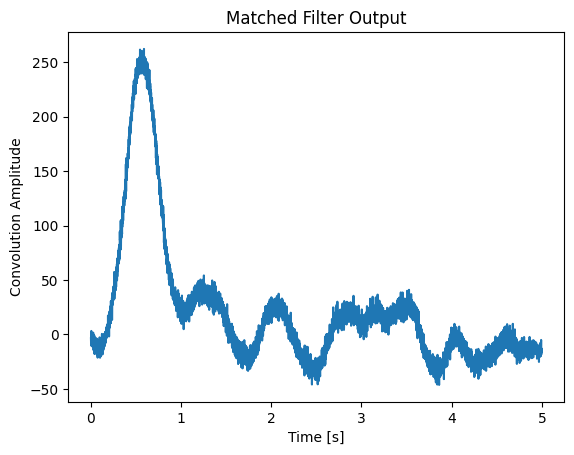

The ERP is most likely to occur at 0.588 second


In [110]:

with open("eeg_signal_to_analyze.pkl", "rb") as file:
    unknown_recording = pickle.load(file)


# Matched Filter Convolution
matched_filter_output = convolve(unknown_recording, average_erp[::-1], mode='same')
plt.plot(time_axis, matched_filter_output)
plt.title('Matched Filter Output')
plt.xlabel('Time [s]')
plt.ylabel('Convolution Amplitude')
plt.show()
print ( f'The ERP is most likely to occur at {np.argmax((matched_filter_output))/1000} second')

The matched filter approach enhances the signal-to-noise ratio and helps detect the presence of the ERP by aligning the template with potential ERP occurrences in a recording. It is particularly effective when the shape and timing of the ERP are consistent. However, the method assumes that the ERP template used for convolution accurately represents the expected ERP waveform. If the ERP varies significantly across different recordings this approach may be less effective.